## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# Análisis de Datos Exploratorio (EDA)

In [ ]:
# Importamos las librerias necesarias para nuestro proyecto
# ==============================================================================

# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import numpy as np
import pandas as pd

#importamos las librerias necesarias para Gráficos
# ==============================================================================
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
import datetime

# Preprocesado y modelado
# scikit-learn
# ==============================================================================
from scipy.stats             import pearsonr
from scipy.stats             import skew, kurtosis
from sklearn.datasets        import load_digits

from sklearn.dummy           import DummyClassifier
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.cluster         import KMeans
from sklearn.neighbors       import NearestNeighbors


# scikit-learn Metricas
# ==============================================================================
from sklearn.metrics         import davies_bouldin_score
from sklearn.metrics         import silhouette_score
from sklearn.metrics         import calinski_harabasz_score
from sklearn.cluster         import AgglomerativeClustering
import scipy.cluster.hierarchy as hc

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
# Ignorar todas las advertencias (no se recomienda en la mayoría de los casos)
warnings.filterwarnings('ignore')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar datos a analizar
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/costumers.csv')

In [ ]:
# Revisamos nuestro archivo a analisar como esta compuesto
df.head(10)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0
5,15610.45,1,0,59690.66,12.3,1
6,14119.30,1,0,70880.40,14.3,1
7,9156.42,0,1,48735.42,7.2,1
8,12823.76,1,0,57839.57,10.9,0
9,12852.12,1,0,53205.46,5.6,1


In [ ]:
# Vemos informacion de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
# Tenemos un archivo con 500 datos, 6 columnas dsitribuidas en variables continuas y discretas.
# Variable continua (flotante): 3 columnas
# discreta (Entero): 3 columnas
# Categorica (String): 0

In [ ]:
# Reviso los nombres de las columnas
list(df.columns)

['Salario',
 'Credito_tipo_1',
 'Credito_tipo_2',
 'Limite_TC',
 'Tiempo_cliente',
 'Producto_ofrecido']

In [ ]:
# Resumen estadístico de los atributos numéricos
df.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [ ]:
# Vemos Salario y Limite_tc sus max y min están muy lejos de sus valores medio y std analizaremos outliers más adelante


# Completitud del archivo

In [ ]:
# Chequeamos porcentaje de completitud del archivo de datos
# :.2f para aproximar a 2 decimales
# f" " corresponde a un formateo string todo lo q la procede
print(f"El % de completitud es: {df.count().sum() / df.size * 100:.2f}%")

El % de completitud es: 100.00%


# Duplicados en el archivo

In [ ]:
# Revisamos si hay filas duplicadas en las columnas del df
duplicados = df[df.duplicated()]
duplicados.shape

(0, 6)

In [ ]:
total_dupli = duplicados.shape[0]
print(f" Tenemos {total_dupli} filas duplicadas en nuestro dataframe")

 Tenemos 0 filas duplicadas en nuestro dataframe


In [ ]:
colum_dupli = df.columns[df.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")

No hay columnas duplicadas en nuestro dataframe


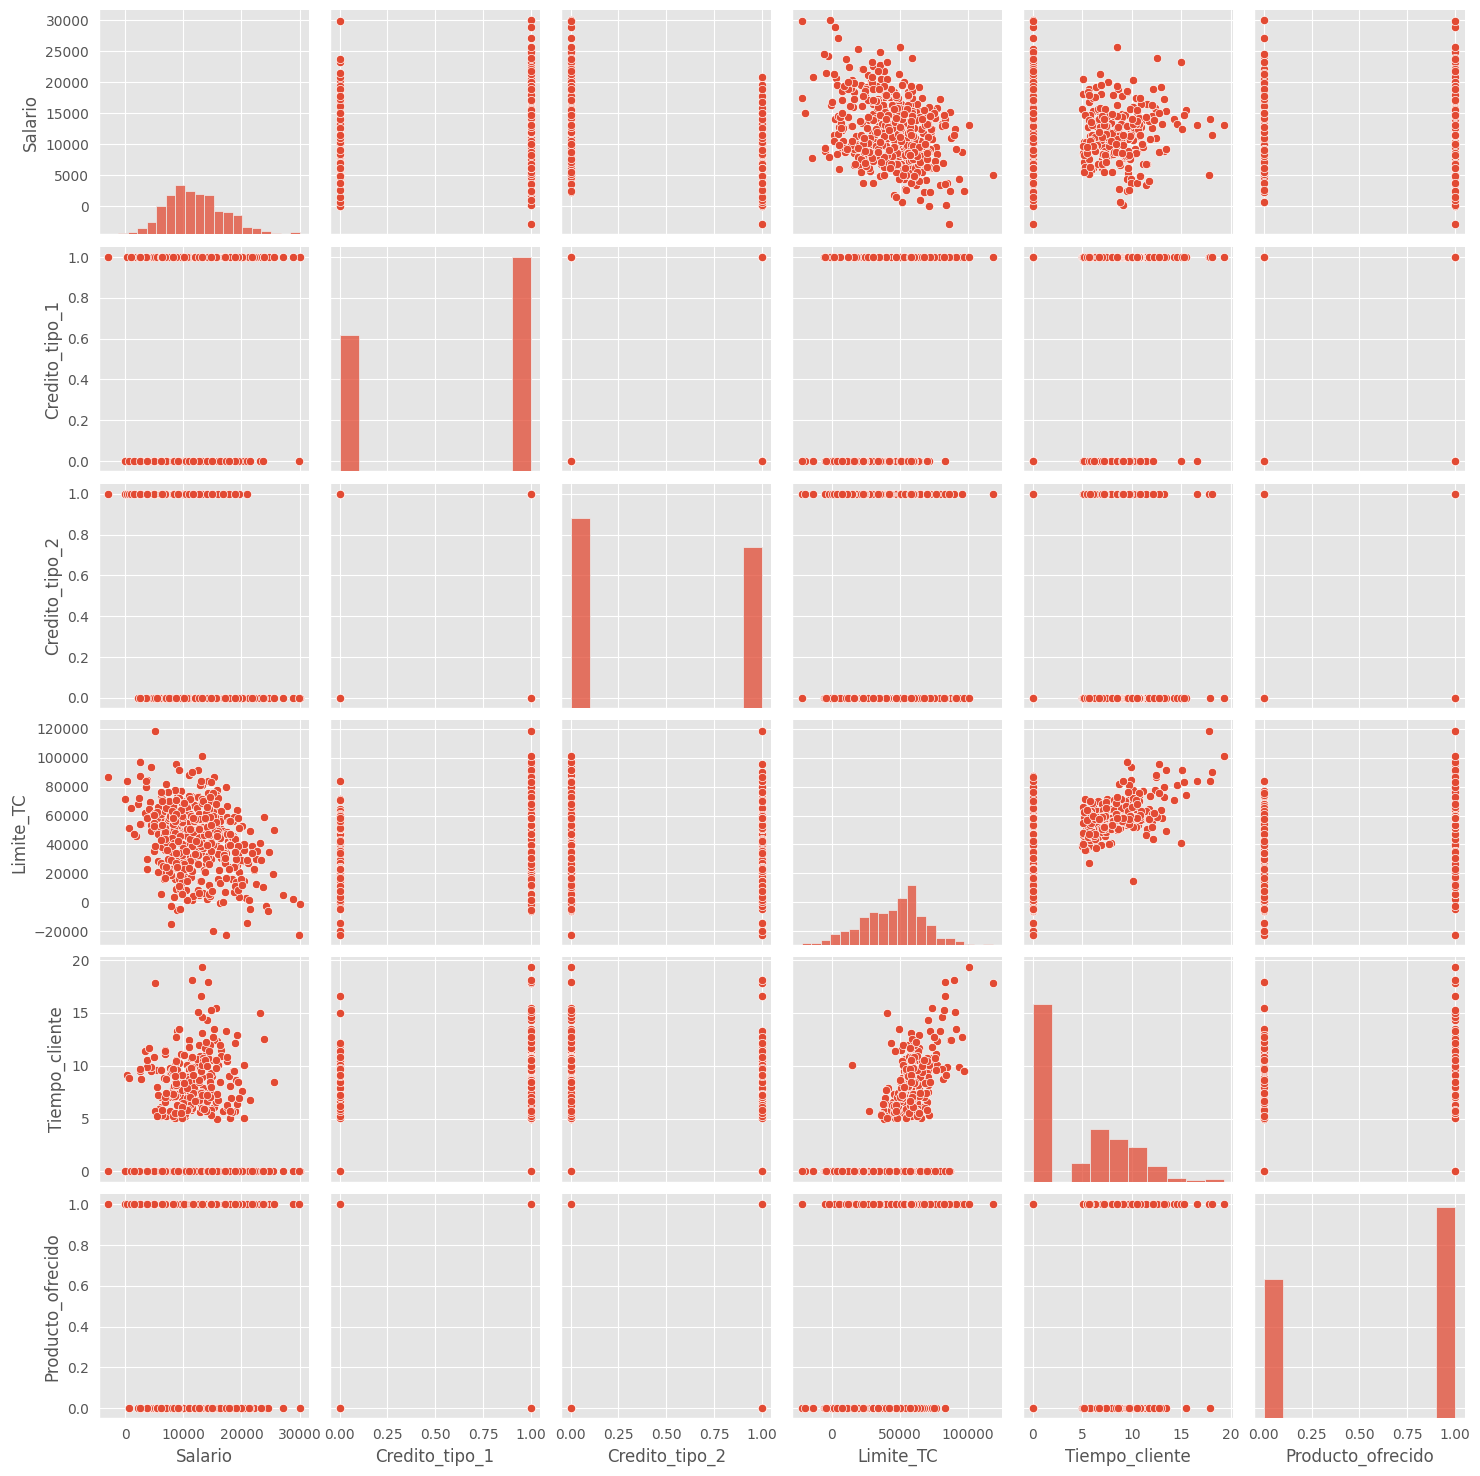

In [ ]:
# Analisis de nuestros datos expresados en gráficos para analisar como se distribuyen y su comportamiento
sns.pairplot(df)
plt.show();

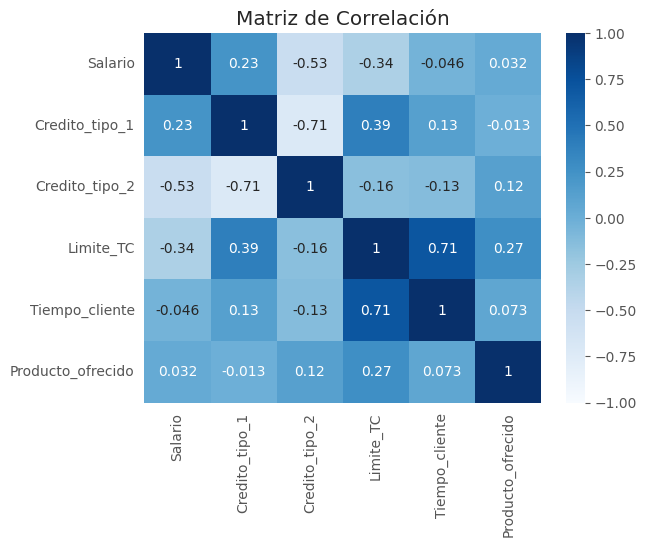

In [ ]:
# Análisis multivariable
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='Blues');
plt.title('Matriz de Correlación')
plt.show()

Vemos que la mayor relación en nuestros datos son las columnas de Tiempo_cliente con Limite_TC. Si lo analaisasmos es lo común que realizan las entidades bancarias, a cliente más antiguo le suben el limite de crédito. Como premio a su comprtamiento y metodo de seguir reteniendolo en la institución.  

In [ ]:
# Analisamos los tipo de productos que los clientes obtuvieron:

In [ ]:
# Producto financiero tipo 1
df["Credito_tipo_1"].value_counts()

1    305
0    195
Name: Credito_tipo_1, dtype: int64

In [ ]:
# Hay 305 clientes que tienen este producto contratado

In [ ]:
# Producto financiero tipo 2
df["Credito_tipo_2"].value_counts()

0    271
1    229
Name: Credito_tipo_2, dtype: int64

In [ ]:
# Hay 271 clientes que tienen este producto contratado

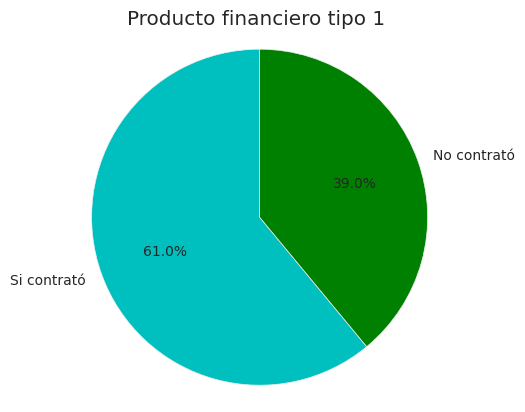

In [ ]:
# Calcular la cantidad de contratados y no contratados
contratados = df["Credito_tipo_1"].sum()
# contratados = df['Contratado'].value_counts()
no_contratados = len(df) - contratados

# Lista de valores y etiquetas
sizes = [contratados, no_contratados]
labels = ['Si contrató', 'No contrató']
colors = ["c", "g"]

# Crear el gráfico de torta
fig, ax = plt.subplots()
# tipo de grafico
ax.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
ax.set_title("Producto financiero tipo 1 ")

# Mostrar el gráfico
plt.show()

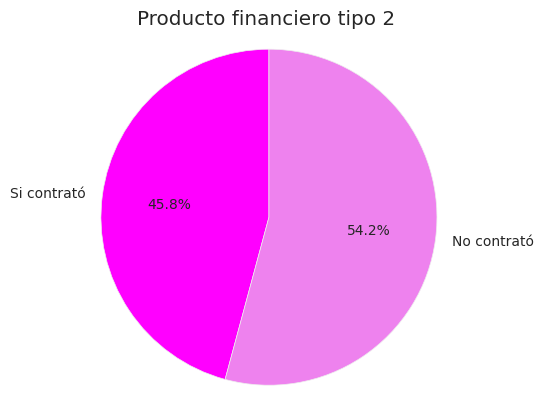

In [ ]:
# Calcular la cantidad de contratados y no contratados
contratados = df["Credito_tipo_2"].sum()
# contratados = df['Contratado'].value_counts()
no_contratados = len(df) - contratados

# Lista de valores y etiquetas
sizes = [contratados, no_contratados]
labels = ['Si contrató', 'No contrató']
colors = ["magenta", "violet"]

# Crear el gráfico de torta
fig, ax = plt.subplots()
# tipo de grafico
ax.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
ax.set_title("Producto financiero tipo 2 ")

# Mostrar el gráfico
plt.show()

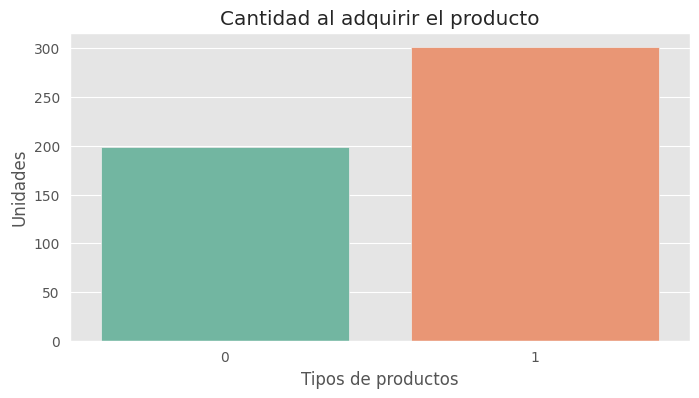

In [ ]:
# Configuracion de tamaño
plt.figure(figsize=(8,4))

sns.countplot(data=df, x="Producto_ofrecido", palette="Set2")
# Titulo grafico
plt.title("Cantidad al adquirir el producto")
# Titulos de ejes
plt.xlabel("Tipos de productos")
plt.ylabel("Unidades")

plt.show()

# Buscamos Outliers y los eliminamos


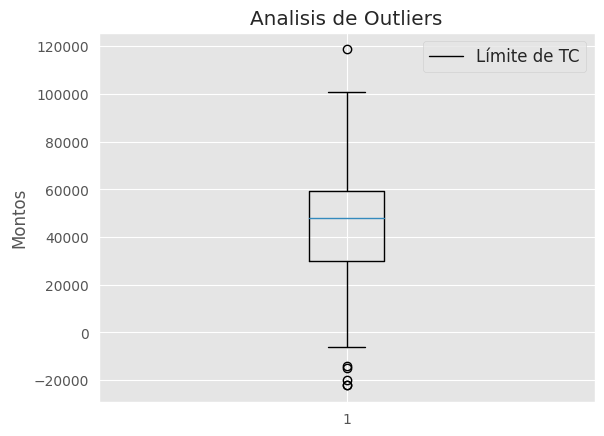

In [ ]:
# Crear el boxplot y chequearemos los varoles de Limite_TC, buscando outliers, chequearemos individualmente casos atipicos con un boxplot
plt.boxplot(df["Limite_TC"])
# Configurar titulo
plt.title('Analisis de Outliers')

# Configurar la leyenda
plt.ylabel("Montos")
# Nombre de la leyenda
legend_label = ["Límite de TC"]
# Cambiar el tamaño de la leyenda
plt.legend(legend_label, loc='best', fontsize=12)

plt.show();

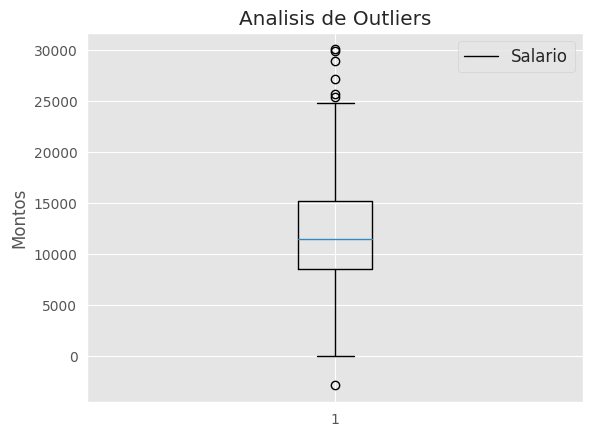

In [ ]:
# Crear el boxplot y chequearemos los varoles de Salario, buscando outliers, chequearemos individualmente casos atipicos con un boxplot
plt.boxplot(df["Salario"])
# Configurar el titulo
plt.title('Analisis de Outliers')

# Configurar la leyenda
plt.ylabel("Montos")
# Nombre de la leyenda
legend_label = ["Salario"]
# Cambiar el tamaño de la leyenda
plt.legend(legend_label, loc='best', fontsize=12)


plt.show();

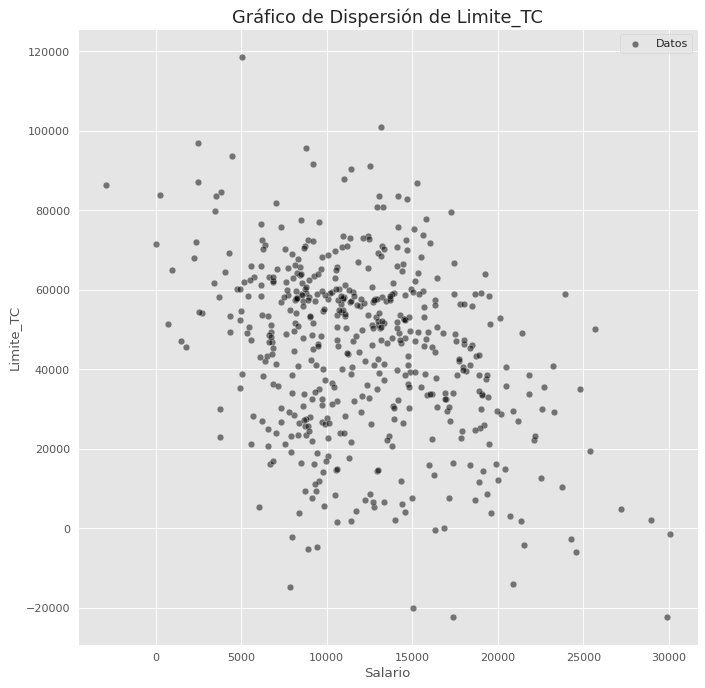

In [ ]:
# Visualizar el gráfico de dispersión utilizando Seaborn de la columna 'Limite TC'
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(x=df["Salario"], y=df["Limite_TC"], c="black", alpha=0.5)

# título y etiquetas a los ejes del gráfico de dispersión
plt.title("Gráfico de Dispersión de Limite_TC", fontsize=16)
plt.xlabel("Salario", fontsize=12)
plt.ylabel("Limite_TC", fontsize=12)

legend_label = ["Datos"]
plt.legend(legend_label, loc='best', fontsize=10)

# Mostrar el gráfico de dispersión
plt.show();


Analizo la distribución de nuestros datos en las variables con más dispersión

In [ ]:
# Libreria de asmetria y curtosis
from scipy.stats import skew, kurtosis
# Analisamos los datos de limite de tc que tieneden a lo graficado a tener outliers
data = df["Limite_TC"]
# Cálculo de la asimetría y la curtosis
skewness = skew(data)
kurt = kurtosis(data)
#  se evalúa si la asimetría y la curtosis calculadas están dentro de un umbral de 0.5
if abs(skewness) < 0.5 and abs(kurt) < 0.5:
  # Si son menores
    print("Los datos parecen seguir una distribución normal.")
else:
  # si son mayores
    print("Los datos no siguen una distribución normal.")


Los datos parecen seguir una distribución normal.


In [ ]:
# Analisamos los datos de salarios que tieneden a lo graficado a tener outliers
data = df["Salario"]
# Cálculo de la asimetría y la curtosis
skewness = skew(data)
kurt = kurtosis(data)
#  se evalúa si la asimetría y la curtosis calculadas están dentro de un umbral de 0.5
if abs(skewness) < 0.5 and abs(kurt) < 0.5:
  # Si son menores
    print("Los datos parecen seguir una distribución normal.")
else:
   # si son mayores
    print("Los datos no siguen una distribución normal.")

Los datos parecen seguir una distribución normal.


El código 1: utiliza un enfoque basado en la desviación estándar, lo que podría ser útil si tienes datos que siguen una distribución normal.

In [ ]:
# Ocuparemos esta opción 1 para eliminar outliers por la distribucion de nuestros datos
from sklearn import neighbors
# Revision y eliminacion de outlies

from sklearn.neighbors import NearestNeighbors
# Número de vecinos mas cercanos a detectar
k = 3
# se configurará para buscar los 3 vecinos más cercanos para cada punto de tus datos.
neighbors_model = NearestNeighbors(n_neighbors=k)
# se entrena el modelo de vecinos más cercanoscon los datos de nuestro df
neighbors_model.fit(df)
#  calculamos las distancias y los índices de los vecinos más cercanos para cada punto en tus datos
distances, indices = neighbors_model.kneighbors(df)
# Calcular las distancias máximas por punto
max_distances = distances[:, -1]
# establecer un umbral para identificar outliers
threshold = max_distances.mean() + 2 * max_distances.std()
# Identificar los outliers
outliers_indices = df.index[max_distances > threshold]
# Eliminación de outliers
df.drop(outliers_indices, inplace=True)
# Vemos como queda nuestra información ya eliminado outliers
df.info()


NameError: ignored

In [ ]:
# De 500 datos quedamos con 486 datos, despúes de eliminado los outliers.

El código 2: NO SE OCUPARA, utiliza un enfoque basado en percentiles, lo que podría ser útil si tus datos no siguen una distribución normal y deseas eliminar observaciones con distancias significativamente mayores a la mayoría de las demás.

In [ ]:
# No se ocupó este opción.
from sklearn.neighbors import NearestNeighbors

# Revision y eliminacion de outlies numeros decimales
continuas = df.select_dtypes(include=["float"])

X = continuas.values
k = 5

# calcula la distancia euclidiana
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)
# Distancia media entre cada observación y sus k vecinos más cercanos
avg_distances = np.mean(distances[:, 1:], axis=1)
# umbral para la distancia media
threshold = np.percentile(avg_distances, 95)
# indentificar los outliers
outliers = np.where(avg_distances > threshold)[0]
# eliminar los outliers del data frame original
df = df.drop(df.index[outliers])

# Reviso cuanta información tengo despues de eliminar atipicos
df.info()

# Estandarización de datos

In [ ]:
# Aplicamos estandarización ya que nuestros datos no tienen el mismo criterio para evaluar, es necesario realizar estandarización.
# dejamos en la variable el modelo escalar
scaler = StandardScaler()
# En esta cajita se realizan todos los calculos matemáticos y estadísticos a realizar
scaler

StandardScaler()

In [ ]:
# Ajustar (fit) el scaler a tus datos de entrenamiento
df[df.columns] = scaler.fit_transform(df[df.columns])

In [ ]:
# Vemos nuestros datos estandarizados
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.212750,0.801182,-0.920820,-0.728262,-0.917431,0.811605
1,-0.277164,0.801182,1.085989,0.409941,-0.917431,0.811605
2,-0.387506,-1.248157,1.085989,-1.309852,-0.917431,-1.232126
3,0.401695,0.801182,-0.920820,-0.694582,-0.917431,0.811605
4,-1.123873,-1.248157,1.085989,-1.189147,-0.917431,-1.232126


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            486 non-null    float64
 1   Credito_tipo_1     486 non-null    float64
 2   Credito_tipo_2     486 non-null    float64
 3   Limite_TC          486 non-null    float64
 4   Tiempo_cliente     486 non-null    float64
 5   Producto_ofrecido  486 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


In [ ]:
# Tenemos todas las columnas con datos flotantes (Variables continuas)

In [ ]:
# Creamos nuestra variable X con las variables para el clustering del df
X = df[["Salario", "Credito_tipo_1", "Credito_tipo_2", "Limite_TC", "Tiempo_cliente", "Producto_ofrecido"]]
X

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.212750,0.801182,-0.920820,-0.728262,-0.917431,0.811605
1,-0.277164,0.801182,1.085989,0.409941,-0.917431,0.811605
2,-0.387506,-1.248157,1.085989,-1.309852,-0.917431,-1.232126
3,0.401695,0.801182,-0.920820,-0.694582,-0.917431,0.811605
4,-1.123873,-1.248157,1.085989,-1.189147,-0.917431,-1.232126
...,...,...,...,...,...,...
494,-0.742486,-1.248157,1.085989,-1.996919,-0.917431,-1.232126
495,-0.598622,-1.248157,1.085989,-0.130103,-0.917431,-1.232126
497,0.637561,-1.248157,1.085989,-1.814268,-0.917431,-1.232126
498,1.083853,0.801182,-0.920820,-0.709861,-0.917431,0.811605


# Aplicamos técnica de reducción de dimensiones PCA

In [ ]:
# se crea una instancia de la clase pca
pca = PCA()
# se ajusta el modelo PCA a los datos X
pca.fit(X)
# se obtiene la proporción de varianza explicada por cada componente principal
pca.explained_variance_ratio_

array([0.36266004, 0.29542489, 0.16956658, 0.12184638, 0.03205834,
       0.01844375])

 Esta información es útil para comprender qué dimensiones (componentes principales) capturan la mayor parte de la variabilidad en los datos y cuáles podrían ser menos informativas. En estos resultados tenemos 0.36 y 0.29 los más significativos.

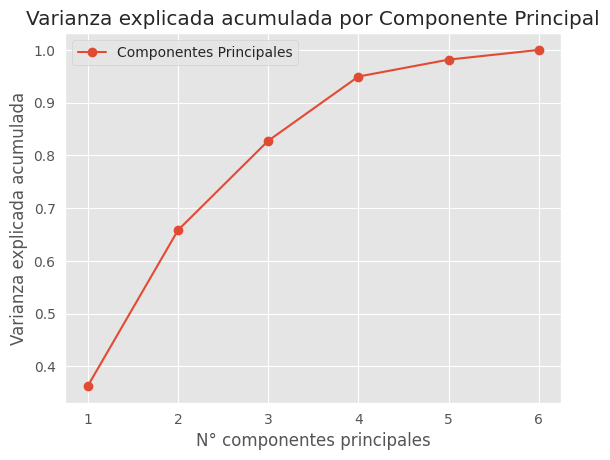

In [ ]:
# Graficaremos la varianza acumulada para cada componente
# se crea una instancia de la clase pca
pca = PCA()
# se ajusta el modelo PCA a los datos X
pca.fit(X)
# se obtiene la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Se obtiene y almacena en una variable la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o")

plt.title("Varianza explicada acumulada por Componente Principal")
plt.xlabel("N° componentes principales")
plt.ylabel("Varianza explicada acumulada")
# Nombre de la leyenda
legend_label = ["Componentes Principales"]
plt.legend(legend_label, loc='best', fontsize=10)

plt.show();


In [ ]:
# Aplicar PCA para reducir la dimensionalidad de tus datos a 2 componentes principales
pca = PCA(n_components=2)
# Entrenamiento pca a nuestro conjunto de datos del df
pca.fit(X)
# Aplicamos la trasnformacion a nuestros datos
X_pca = pca.fit_transform(X)
# Mostramos como quedaron nuestros datos
X_pca

array([[ 9.57732110e-01,  2.20369856e+00],
       [-3.57320036e-01, -3.88256426e-01],
       [-2.32126146e+00,  7.24230440e-01],
       [ 4.87452572e-01,  1.26704051e+00],
       [-2.46820817e+00,  2.83127554e-01],
       [ 2.09011237e+00, -5.84351386e-01],
       [ 2.38224220e+00, -1.24978281e+00],
       [-1.15116516e+00, -1.43732818e+00],
       [ 1.72719227e+00, -1.86718693e-01],
       [ 1.30146688e+00, -1.88775592e-02],
       [-2.42439667e+00,  1.57467319e+00],
       [-8.94290525e-01, -2.82722333e+00],
       [ 4.62879079e-01,  1.88006742e+00],
       [-2.43321036e+00, -2.68823235e-01],
       [ 1.98830050e+00,  1.63224703e-01],
       [ 6.72753446e-01,  3.47931919e-02],
       [-7.80709733e-01, -1.59550782e+00],
       [ 7.12114124e-01,  2.86957798e+00],
       [-2.79784533e+00,  6.44985311e-01],
       [-1.76253969e+00, -6.02336104e-01],
       [-1.14775033e+00, -1.35353506e+00],
       [-2.36425430e+00,  8.55086552e-01],
       [ 1.69905365e+00, -1.06888419e-01],
       [ 1.

In [ ]:
# Chequeamos sean los datos de prueba 486 y esta correcto
len(X_pca)

486

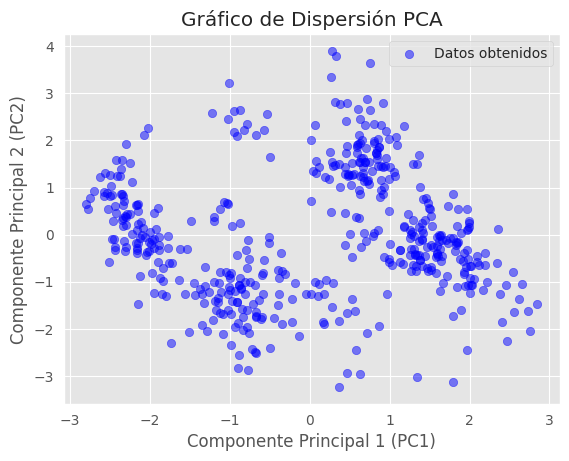

In [ ]:
# Creación de una nueva variable llamada pca_feature1 que contiene la primera columna de X_pca
pca_feature1 = X_pca[:,0]
# Creación de una nueva variable llamada pca_feature2 que contiene la segunda columna de X_pca
pca_feature2 = X_pca[:,1]
# pca_feature1 en el eje X y pca_feature2 en el eje Y
#plt.scatter(pca_feature1, pca_feature2, c='blue', label='Mis Datos', alpha=0.5)
plt.scatter(pca_feature1, pca_feature2, c='blue', alpha=0.5)
# Titulo
plt.title('Gráfico de Dispersión PCA')
# Ejes
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
#plt.legend()

# Nombre de la leyenda
legend_label = ["Datos obtenidos"]
# Cambiar el tamaño de la leyenda
plt.legend(legend_label, loc='best', fontsize=10)


plt.show()

# Método del Codo para Determinar la Cantidad Óptima de Grupos

In [ ]:
# Libreria a ocupar
from sklearn.cluster import KMeans
# Método del codo para determinar el número óptimo de clusters

# Lista vacia donde almacenaremos datos obtenidos
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
# Se ajusta modelo a los dato pca reducidos
    kmeans.fit(X_pca)
# se calcula la inercia para ese número de clusters y se agrega a la lista
    inertia.append(kmeans.inertia_)

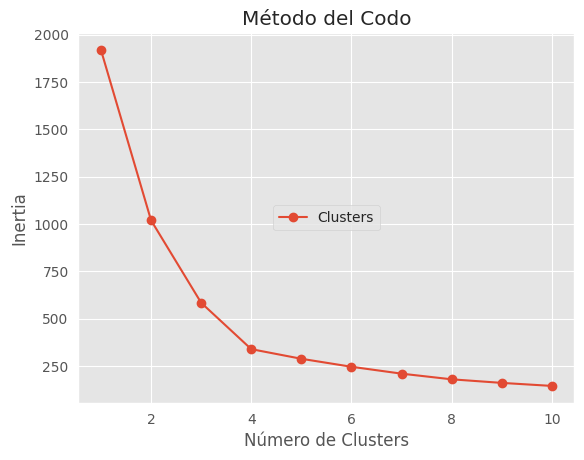

In [ ]:
# Visualizar el método del codo de los datos obtenidos en el paso anterior
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
# Nombre de la leyenda
legend_label = ["Clusters"]
# Cambiar el tamaño de la leyenda
plt.legend(legend_label, loc='center', fontsize=10)
plt.show()

In [ ]:
# Se realizarán 4 cluster para nuestros datos ya que vemos en la gráfica de codo que con 4 cluster

Para el nuevo producto financiero a ofrecer, teniendo en cuenta los distintos limites de créditos, es necesario se agrupe en 4 grupos de clientes que sería lo más óptimo para la entidad bancaria.

# Aplicación del Modelo de Clustering Vecinos mas cercanos

El modelo a ocupar será kmeans, este toma la cantidad de vecinos o elementos mas cercanos y  ve enque caracteristica está, y pone el elemento dependiendo la distribucion que tengan esos puntos. Para nuestros datos financieros es un metodo bien eficiente y nos dará la agrupación adecuada del segmento de clientes necesaria.

KMeans Vecinos más cercanos

In [ ]:
# Libreria necesaria para kmeans
from sklearn.cluster import KMeans
# Variable donde almacenamos el número óptimo de clusters optimos
# en nuestro caso será 4 grupos
optimal_clusters = 4

# Ajustamos parametros del modelo K-Means, se dejan valores en init, max_iter, n_init, random_state aplicados en clase semana 14
kmeans = KMeans(n_clusters = optimal_clusters, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
# Aplicamos metodo k means a nuestros datos
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
# Vemos nuestro resultado
y_kmeans

array([0, 3, 1, 0, 1, 2, 2, 3, 2, 2, 1, 3, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1,
       2, 0, 2, 0, 2, 3, 1, 1, 0, 2, 1, 1, 0, 2, 3, 0, 3, 0, 2, 1, 2, 0,
       0, 0, 0, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 0, 3, 2, 0, 2, 3, 1,
       1, 0, 2, 1, 2, 3, 2, 3, 2, 0, 0, 0, 0, 1, 2, 2, 3, 1, 2, 0, 0, 2,
       1, 2, 3, 2, 2, 0, 0, 1, 0, 2, 0, 2, 3, 3, 0, 1, 3, 2, 1, 3, 0, 2,
       1, 2, 2, 0, 2, 0, 3, 2, 1, 1, 1, 3, 0, 1, 3, 1, 2, 3, 0, 3, 1, 3,
       1, 0, 2, 1, 2, 0, 2, 3, 3, 0, 3, 1, 0, 3, 2, 2, 0, 2, 3, 0, 1, 2,
       3, 3, 2, 0, 2, 0, 2, 1, 3, 3, 0, 1, 3, 2, 3, 0, 0, 1, 1, 0, 0, 3,
       1, 2, 3, 2, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 0, 0, 3, 0, 1,
       0, 2, 3, 3, 0, 3, 2, 0, 0, 0, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 1, 2, 3, 0, 3, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 0, 1, 2, 1, 3, 3, 2, 2, 2,
       2, 1, 2, 3, 1, 2, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2,
       2, 0, 2, 3, 3, 1, 2, 0, 2, 0, 0, 3, 2, 1, 1,

In [ ]:
# Cuantificamos la cantidad de valores por cluster obtenidos
np.unique(y_kmeans, return_counts= True)

(array([0, 1, 2, 3], dtype=int32), array([116, 100, 148, 122]))

In [ ]:
from sklearn.cluster import KMeans
# creamos nuestra variable donde tendremos la in formacion de nuestro modelo de cluster
model = KMeans(n_clusters= 4)
# Aplicamos entrenamiento
cluster_label = model.fit_predict(X_pca)
# Mostramos nuestros datos
print(cluster_label)

[2 0 1 2 1 3 3 0 3 3 1 0 2 1 3 3 0 2 1 1 0 1 3 2 3 2 3 0 1 1 2 3 1 1 2 3 0
 2 0 2 3 1 3 2 2 2 2 0 0 3 0 1 1 3 3 3 3 3 1 2 0 3 2 3 0 1 1 2 3 1 3 0 3 0
 3 2 2 2 2 1 3 3 0 1 3 2 2 3 1 3 0 3 3 2 2 1 2 3 2 3 0 0 2 1 0 3 1 0 2 3 1
 3 3 2 3 2 0 3 1 1 1 0 2 1 0 1 3 0 2 0 1 0 1 2 3 1 3 2 3 0 0 2 0 1 2 0 3 3
 2 3 0 2 1 3 0 0 3 2 3 2 3 1 0 0 2 1 0 3 0 2 2 1 1 2 2 0 1 3 0 3 0 3 3 3 0
 0 1 0 0 0 3 0 1 2 2 0 2 1 2 3 0 0 2 0 3 2 2 2 0 1 0 3 2 3 0 3 3 3 1 3 3 1
 2 1 1 2 3 3 3 1 0 1 3 0 0 0 1 3 0 2 0 2 3 3 2 3 3 3 3 2 0 2 1 0 0 2 1 3 1
 0 0 3 3 3 3 1 3 0 1 3 0 2 2 2 1 1 1 1 2 0 3 0 1 2 3 3 3 2 3 0 0 1 3 2 3 2
 2 0 3 1 1 0 0 1 2 1 2 1 2 1 2 1 2 3 0 3 3 2 0 0 3 2 3 2 2 0 3 0 3 3 3 0 1
 0 2 2 0 0 0 0 1 3 3 1 0 2 3 3 2 3 2 0 2 3 3 2 1 3 1 0 3 3 3 1 0 0 2 1 1 2
 3 2 0 0 1 2 0 1 2 0 3 2 1 3 3 1 1 1 0 2 2 0 3 1 3 3 0 0 3 0 0 0 2 3 2 0 0
 1 1 2 3 1 0 2 0 1 3 1 2 3 3 3 3 0 3 2 2 2 3 0 3 0 3 0 2 0 0 0 1 2 1 1 3 0
 1 0 3 0 2 2 3 3 3 3 0 2 1 3 2 0 3 1 0 2 3 3 2 1 3 0 3 0 3 1 2 0 0 3 2 2 3
 1 1 1 2 3]


In [ ]:
# creamos un df con los valores obtenidos
df = pd.DataFrame(X_pca, columns= ['Columna_1', 'Columna_2'])
# agregamos una columna Cluster a nuestro df
df['Cluster'] = cluster_label
# mostramos nuestra data
df.head(5)

,Columna_1,Columna_2,Cluster
0,0.957732,2.203699,2
1,-0.357320,-0.388256,0
2,-2.321261,0.724230,1
3,0.487453,1.267041,2
4,-2.468208,0.283128,1


In [ ]:
# Obtenemos nuestros centroides del modelo ocupado
centers = model.cluster_centers_
# Creamos una variable con los centroides
center_coord = pd.DataFrame(centers)
# Vemos nuestro resultado
center_coord

,0,1
0,-0.689193,-1.450300
1,-2.118534,0.326258
2,0.488138,1.775447
3,1.616966,-0.416494


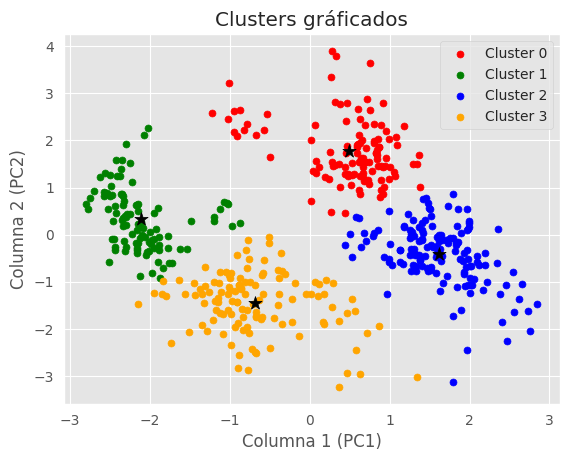

In [ ]:
# Opcion 1 de grafico visto en clases
# Graficamos nuestros clusters obtenidos
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.scatter(center_coord[0], center_coord[1], s = 100, color= 'black', marker='*')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], s = 100, marker='*', c = "black", label = "Centroides")
plt.title("Clusters gráficados")
plt.xlabel('Columna 1 (PC1)', fontsize=12)
plt.ylabel('Columna 2 (PC2)', fontsize=12)
plt.legend()
plt.show()

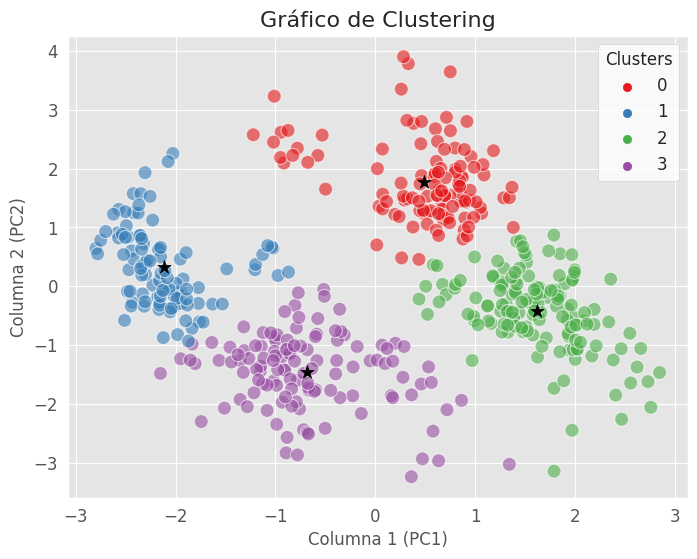

In [ ]:
# Opcion 2 de gráfico de clusters mas avanzado

# Libreria a ocupar
import seaborn as sns
import matplotlib.pyplot as plt

# Configuracion dimensio, tamaño del grafuico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='Set1', s=100, alpha=0.6)
plt.scatter(center_coord[0], center_coord[1], s = 100, color= 'black', marker='*')

# Personalizamos la apariencia de nuestro gráfico
sns.set_style('whitegrid')  # Establecemos el estilo de la cuadrícula
plt.title('Gráfico de Clustering', fontsize=16)
plt.xlabel('Columna 1 (PC1)', fontsize=12)
plt.ylabel('Columna 2 (PC2)', fontsize=12)
# Tamaño de letra
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Personalización leyenda
plt.legend(title='Clusters', fontsize=12, title_fontsize=12)

# Mostrar el gráfico
plt.show()


<Figure size 1600x1600 with 0 Axes>

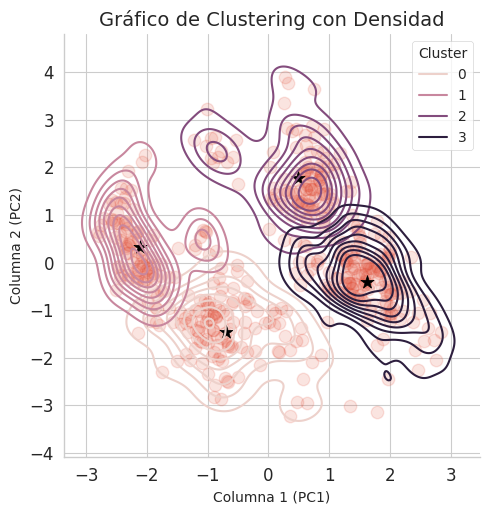

In [ ]:
# opción gráfico con densidad de los clusters
# Configuración del tamaño del gráfico
plt.figure(figsize=(16, 16))

# Gráfico de dispersión de puntos
sns.lmplot(data= df, x= 'Columna_1', y= 'Columna_2', fit_reg= False, scatter_kws={'alpha':0.15, 's':80})

# Gráfico de densidad visto en clases
sns.kdeplot(data= df, x= 'Columna_1', y= 'Columna_2', hue= 'Cluster')
#sns.kdeplot(data=X_pca, x=X_pca[:, 0], y=X_pca[:, 1], fill=True)
# centroides
plt.scatter(center_coord[0], center_coord[1], s=100, color='black', marker='*')

# Personalización de la apariencia del gráfico
sns.set_style('whitegrid')
plt.title('Gráfico de Clustering con Densidad', fontsize=14)
plt.xlabel('Columna 1 (PC1)', fontsize=10)
plt.ylabel('Columna 2 (PC2)', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda personalizada
#handles, labels = scatter.get_legend_handles_labels()
#plt.legend(handles=handles[:0], labels=labels[:3], title='Centroides', fontsize=10, title_fontsize=10)

# Mostrar el gráfico
plt.show();


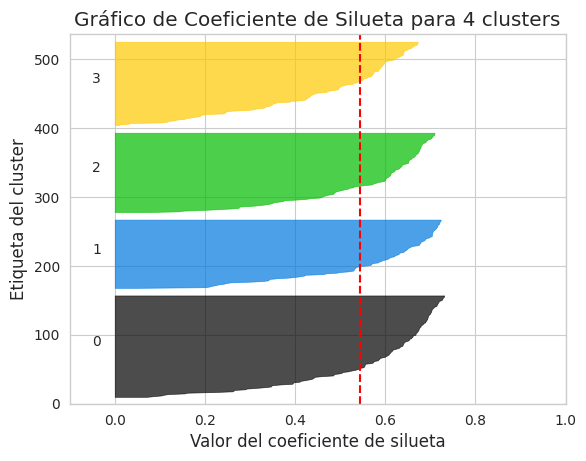


Número de clusters = 4, Coeficiente de silueta promedio = 0.5432705036820951


In [ ]:
# Gráfico de coeficiente de silueta para 4 clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generar datos de ejemplo
X = X_pca
# Definir el rango de número de clusters que quieres probar
range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Crear una instancia de KMeans con el número de clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular el coeficiente de silueta para cada muestra
    silhouette_avg = silhouette_score(X, cluster_labels)
    #print(f'Número de clusters = {n_clusters}, Coeficiente de silueta promedio = {silhouette_avg}')

    # Calcular el coeficiente de silueta para cada muestra individual
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Crear una figura para visualizar el coeficiente de silueta
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10

    for i in range(n_clusters):
        # Agregar el coeficiente de silueta de las muestras pertenecientes al cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta para el cluster i en el gráfico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Actualizar y_lower para el próximo cluster
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de Coeficiente de Silueta para 4 clusters")
    ax1.set_xlabel("Valor del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    # La línea vertical que indica el valor promedio del coeficiente de silueta en todos los clusters
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show();
    print( )
    print(f'Número de clusters = {n_clusters}, Coeficiente de silueta promedio = {silhouette_avg}')

# Scoring de nuestros clusters

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
print("====================================================================")
print("Scoring  para nuestros 4 cluster, tenemos los siguientes resultados:")
print("====================================================================")
print(" |      Coeficiente        |           valor        | ")
print("====================================================================")
# Coeficiente de Silueta
silhouette_avg = silhouette_score(X_pca, y_kmeans, metric='euclidean')
print(f'Coeficiente de Silueta: {silhouette_avg}')

# Índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_pca, y_kmeans)
print(f'Coeficiente de Davies-Bouldin: {davies_bouldin}')

# Índice calinski_harabasz
ch_score = calinski_harabasz_score(X_pca, y_kmeans) #No usa el parámetro metric.
print(f'Coeficiente de Calinski-Harabasz es de {ch_score}.')

Scoring  para nuestros 4 cluster, tenemos los siguientes resultados:
 |      Coeficiente        |           valor        | 
Coeficiente de Silueta: 0.5432705036820951
Coeficiente de Davies-Bouldin: 0.6057455807740479
Coeficiente de Calinski-Harabasz es de 748.7512726476589.


# Evaluación del Modelo ocupado

**Analisis de nuestros scoring y analisis de cluster**


Como vemos en el analisis realizado, la agrupación optima que necesita la entidad bancaria para ofrecer el nuevo producto financiero, medida por nuestro metodo de codo son: 4 agrupaciones de clientes. El como están distribuidos estos grupos se detalla acontinuación explicando nuestros resultados de scoring.

**Coef. de Silueta:** donde a mayor número resultante (Cerca del 1), los clusteres están mejor definidos en el modelo seleccionado. ***En este caso, un valor de 0.543 indica un buen grado de separación y cohesión en tus clusters.***

**Coef. Davies-Bouldin:** mide la "dispersión" entre clusters. Un valor bajo del Coeficiente de Davies-Bouldin (cerca del 0) indica una mejor calidad de clustering, los clústeres estarán mejor definidos. ***En este caso, un valor de 0.606 sugiere que los clusters están relativamente bien definidos.***

**Coef. Calinski-Harabasz:** mide la relación entre la dispersión inter-cluster (lo que sugiere que los puntos de diferentes clusters están significativamente separados entre sí) **y** la dispersión intra-cluster(se refiere a la medida de cuán compactos o cohesionados están los puntos dentro de un cluster en el espacio de características). Un valor alto indica que los clusters están bien separados y compactos, lo que se considera una buena calidad de clustering. ***En este caso, un valor de 748.751 sugiere que los clusters tienen una buena separación y compacidad.***

**Podemos afirmar que la agrupación y separación en nuestro modelo de clustering (grupo de clientes) es efectiva, gracias a los valores obtenidos. Los clusters se encuentran bien definidos, muestran una buena compacidad, lo que a su vez se traducirá en una favorable aceptación del nuevo producto financiero ofrecido a los 4 grupos de clientes.**

# **Parte 2 del proyecto**

Con 50 nuevos registro evaluar modelo creado anteriormente

# Analisis EDA

In [ ]:
# Importar datos a analizar 50 nuevos registros
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/new_costumer.csv')

In [ ]:
# Vemos nuetro nuevo archivo, tiene una nueva columna tipo de clinte
df2.head(10)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0
5,4195.63,0,1,46424.81,0.0,1,3
6,9676.05,1,0,36202.91,0.0,0,0
7,3192.72,1,1,76851.08,6.4,1,1
8,7539.78,0,1,62530.44,11.3,1,0
9,7271.86,1,0,64016.47,5.3,0,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [ ]:
# tenemos 50 datos en 7 columnas

In [ ]:
# descripcion estadistica
df2.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,13232.11440,0.520000,0.500000,38422.669800,2.944000,0.70000,1.380000
std,5767.07832,0.504672,0.505076,20240.655015,3.973338,0.46291,1.122861
min,-638.96000,0.000000,0.000000,-2756.450000,0.000000,0.00000,0.000000
25%,9783.88750,0.000000,0.000000,22922.617500,0.000000,0.00000,0.000000
50%,12849.83500,1.000000,0.500000,39054.305000,0.000000,1.00000,1.000000
75%,16788.67250,1.000000,1.000000,52052.320000,6.350000,1.00000,2.000000
max,23890.65000,1.000000,1.000000,83578.930000,11.300000,1.00000,3.000000


# Completitud

In [ ]:
# Chequeamos porcentaje de completitud del archivo de datos
# :.2f para aproximar a 2 decimales
# f" " corresponde a un formateo string todo lo q la procede
print(f"El % de completitud es: {df2.count().sum() / df2.size * 100:.2f}%")

El % de completitud es: 100.00%


# Duplicados

In [ ]:
# Revisamos si hay filas duplicadas en las columnas del df
duplicados = df2[df2.duplicated()]
duplicados.shape

(0, 7)

In [ ]:
total_dupli = duplicados.shape[0]
print(f" Tenemos {total_dupli} filas duplicadas en nuestro dataframe")

 Tenemos 0 filas duplicadas en nuestro dataframe


In [ ]:
colum_dupli = df.columns[df.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")

No hay columnas duplicadas en nuestro dataframe


# Matriz de correlacion

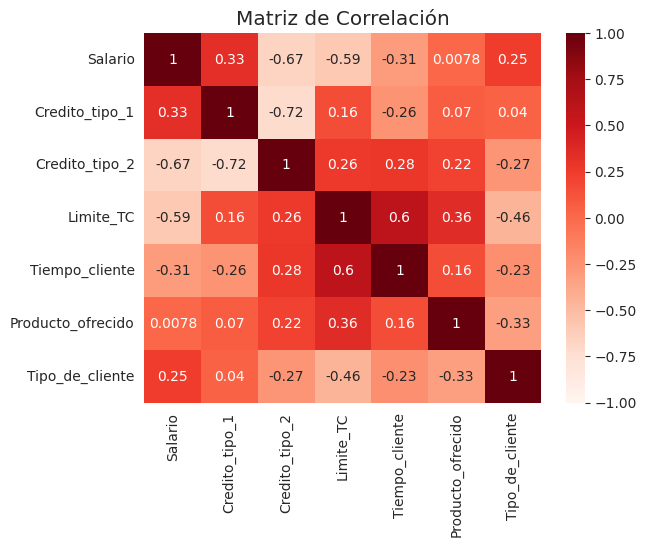

In [ ]:
# Análisis multivariable
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='Reds');
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Vemos como es la correlación que tienen todas las variables entre si
correlation_df2 = df2.corr()
sorted_correlation = correlation_df2.unstack().sort_values(ascending=False)
sorted_correlation

Salario            Salario              1.000000
Credito_tipo_1     Credito_tipo_1       1.000000
Producto_ofrecido  Producto_ofrecido    1.000000
Tiempo_cliente     Tiempo_cliente       1.000000
Credito_tipo_2     Credito_tipo_2       1.000000
Limite_TC          Limite_TC            1.000000
Tipo_de_cliente    Tipo_de_cliente      1.000000
Tiempo_cliente     Limite_TC            0.600622
Limite_TC          Tiempo_cliente       0.600622
Producto_ofrecido  Limite_TC            0.356433
Limite_TC          Producto_ofrecido    0.356433
Credito_tipo_1     Salario              0.332185
Salario            Credito_tipo_1       0.332185
Credito_tipo_2     Tiempo_cliente       0.276605
Tiempo_cliente     Credito_tipo_2       0.276605
Limite_TC          Credito_tipo_2       0.262217
Credito_tipo_2     Limite_TC            0.262217
Tipo_de_cliente    Salario              0.245237
Salario            Tipo_de_cliente      0.245237
Credito_tipo_2     Producto_ofrecido    0.218218
Producto_ofrecido  C

In [ ]:
# vemos la mejor correlacion: Tiempo_cliente - Limite_TC

In [ ]:
# Leo datos anteriores primera parte del analisis con 500 datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/costumers.csv')
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
nuevos_datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto/new_costumer.csv")
nuevos_datos.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
nuevos_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


# Concatenamos los 2 archivos

In [ ]:
import pandas as pd

# Cargar el primer archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/costumers.csv')

# Cargar el segundo archivo CSV
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/new_costumer.csv')

# Concatenar los dos DataFrames
data = pd.concat([df, df2], ignore_index=True)

# Guardar el DataFrame concatenado en un nuevo archivo CSV
data.to_csv("data.csv", index=False)

print("Archivos CSV concatenados exitosamente.")


Archivos CSV concatenados exitosamente.


In [ ]:
# Vemos nuestros datos concatenados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            550 non-null    float64
 1   Credito_tipo_1     550 non-null    int64  
 2   Credito_tipo_2     550 non-null    int64  
 3   Limite_TC          550 non-null    float64
 4   Tiempo_cliente     550 non-null    float64
 5   Producto_ofrecido  550 non-null    int64  
 6   Tipo_de_cliente    50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 30.2 KB


In [ ]:
# Tenemos datos nulos

In [ ]:
# Chequeamos porcentaje de completitud del archivo de datos
# :.2f para aproximar a 2 decimales
# f" " corresponde a un formateo string todo lo q la procede
print(f"El % de completitud es: {data.count().sum() / data.size * 100:.2f}%")

El % de completitud es: 87.01%


# Eliminacion datos nulos o incompletos

In [ ]:
# Borramos datos incompletos
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 500 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.1 KB


In [ ]:
# Quedamos con 50 valores completos

# Eliminacion de outliers

In [ ]:
# Ocuparemos esta opción 1 para eliminar outliers por la distribucion de nuestros datos
from sklearn import neighbors
# Revision y eliminacion de outlies

from sklearn.neighbors import NearestNeighbors
# Número de vecinos mas cercanos a detectar
k = 3
# se configurará para buscar los 3 vecinos más cercanos para cada punto de tus datos.
neighbors_model = NearestNeighbors(n_neighbors=k)
# se entrena el modelo de vecinos más cercanoscon los datos de nuestro df
neighbors_model.fit(data)
#  calculamos las distancias y los índices de los vecinos más cercanos para cada punto en tus datos
distances, indices = neighbors_model.kneighbors(data)
# Calcular las distancias máximas por punto
max_distances = distances[:, -1]
# establecer un umbral para identificar outliers
threshold = max_distances.mean() + 2 * max_distances.std()
# Identificar los outliers
outliers_indices = data.index[max_distances > threshold]
# Eliminación de outliers
data.drop(outliers_indices, inplace=True)
# Vemos como queda nuestra información ya eliminado outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 500 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            48 non-null     float64
 1   Credito_tipo_1     48 non-null     int64  
 2   Credito_tipo_2     48 non-null     int64  
 3   Limite_TC          48 non-null     float64
 4   Tiempo_cliente     48 non-null     float64
 5   Producto_ofrecido  48 non-null     int64  
 6   Tipo_de_cliente    48 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.0 KB


In [ ]:
# De 50 quedamos con 48 datos

In [ ]:
# Creamos nuestra variable X con las variables para el clustering del data
X = data[["Salario", "Credito_tipo_1", "Credito_tipo_2", "Limite_TC", "Tiempo_cliente", "Producto_ofrecido", "Tipo_de_cliente"]]
X.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
500,19028.02,1,0,18845.91,0.0,1,3.0
501,17004.81,1,0,16421.36,0.0,0,2.0
502,12973.54,1,0,57295.44,9.6,1,2.0
503,13995.43,0,0,23556.17,7.7,0,3.0
504,13155.66,0,1,61073.59,10.2,1,0.0


# Estandarizamos

In [ ]:
# Estandarizamos con este modelo escalar
scaler = StandardScaler()
# Transformamos nuestro df2
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
500,1.048595,0.959166,-1.0,-1.056578,-0.742417,0.641689,1.484763
501,0.672842,0.959166,-1.0,-1.187990,-0.742417,-1.558387,0.582629
502,-0.075851,0.959166,-1.0,1.027403,1.673585,0.641689,0.582629
503,0.113936,-1.042572,-1.0,-0.801280,1.195418,-1.558387,1.484763
504,-0.042028,-1.042572,1.0,1.232181,1.824585,0.641689,-1.221640


# PCA Comopnentes principales

In [ ]:
pca = PCA(n_components=2)
# Entrenamiento pca a nuestro conjunto de datos del df
pca.fit(X)
# Aplicamos la trasnformacion a nuestros datos
X_pca = pca.fit_transform(X)
X_pca

array([[-2.36272648, -0.08096547],
       [-2.32499316,  0.62249501],
       [ 0.15074843, -1.75483901],
       [-0.69578484,  1.46863345],
       [ 2.53299652, -0.79704699],
       [ 1.21855085,  1.39398481],
       [-0.73876899, -0.3115003 ],
       [ 2.33594496, -1.41248905],
       [ 3.1515985 , -0.71735126],
       [ 0.02024224, -0.62316943],
       [ 1.89988231,  1.00976706],
       [ 0.84413497,  1.02961887],
       [ 1.7209461 , -1.0158862 ],
       [-2.54091712, -0.48264959],
       [-1.45527118, -1.27258248],
       [-1.04104235, -1.29019664],
       [-0.98940186,  0.01560532],
       [-0.07573284,  2.19676263],
       [-1.87559597, -1.1568079 ],
       [-2.29662824,  0.41444214],
       [ 1.42990823, -1.05121702],
       [-2.3795917 , -0.69478558],
       [-2.77198326,  0.56082555],
       [ 0.61539083,  0.74351849],
       [-0.93394961,  1.57967952],
       [-0.66995893, -1.18807401],
       [ 2.65096164, -0.60263308],
       [ 0.25544809, -1.50169616],
       [-0.27069159,

In [ ]:
# Chequeamos sean los datos de prueba 48 y esta correcto
len(X_pca)

48

# Aplicamos Kmeans a nuestros nuevos datos

In [ ]:
from sklearn.cluster import KMeans
# Variable donde almacenamos el número óptimo de clusters optimos
# en nuestro caso será 4 grupos
optimal_clusters = 4

# Ajustamos parametros del modelo K-Means, se dejan valores en init, max_iter, n_init, random_state aplicados en clase semana 14
kmeans = KMeans(n_clusters = optimal_clusters, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
# Aplicamos metodo k means a nuestros datos
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
# Cuantificamos la cantidad de valores por cluster obtenidos
np.unique(y_kmeans, return_counts= True)

(array([0, 1, 2, 3], dtype=int32), array([11, 14, 15,  8]))

In [ ]:
from sklearn.cluster import KMeans
# creamos nuestra variable donde tendremos la informacion etiqueta de nuestro modelo de cluster
model = KMeans(n_clusters= 4)
# Aplicamos entrenamiento
cluster_label = model.fit_predict(X_pca)
# Mostramos nuestros datos
print("Etiquetas de los datos")
print(cluster_label)

Etiquetas de los datos
[3 3 1 2 0 2 1 0 0 1 0 2 0 3 1 1 1 2 1 3 0 3 3 2 2 1 0 1 2 1 2 0 0 0 1 2 0
 0 3 2 1 0 1 3 2 0 0 1]


In [ ]:
# creamos un df con los valores obtenidos
df = pd.DataFrame(X_pca, columns= ['Columna_1', 'Columna_2'])
# agregamos una columna Cluster a nuestro df para nuestras etiquetas
df['Cluster'] = cluster_label
# mostramos nuestra data
df.head(5)

,Columna_1,Columna_2,Cluster
0,-2.362726,-0.080965,3
1,-2.324993,0.622495,3
2,0.150748,-1.754839,1
3,-0.695785,1.468633,2
4,2.532997,-0.797047,0


In [ ]:
# Obtenemos nuestros centroides del modelo ocupado
centers = model.cluster_centers_
# Creamos una variable con los centroides
center_coord = pd.DataFrame(centers)
# Vemos nuestro resultado
center_coord

,0,1
0,2.051095,-0.271754
1,-0.822682,-1.134064
2,0.028890,1.865353
3,-2.445833,-0.070710


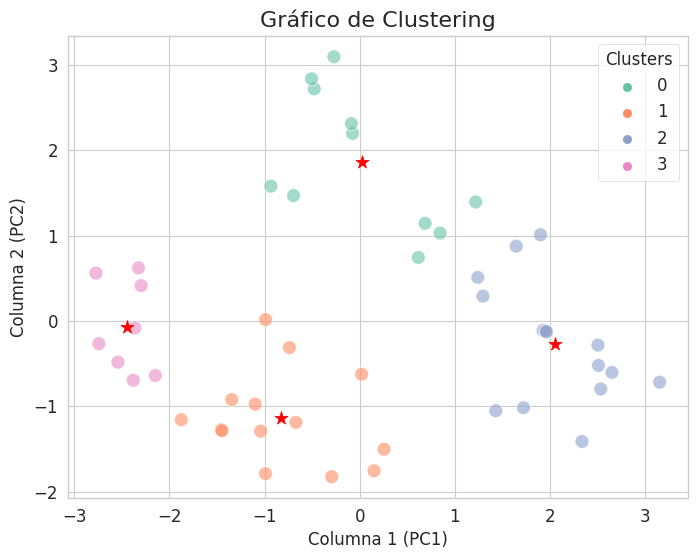

In [ ]:
# Opcion 2 de gráfico de clusters mas avanzado

# Libreria a ocupar
import seaborn as sns
import matplotlib.pyplot as plt

# Configuracion dimensio, tamaño del grafuico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='Set2', s=100, alpha=0.6)
plt.scatter(center_coord[0], center_coord[1], s = 100, color= 'red', marker='*')

# Personalizamos la apariencia de nuestro gráfico
sns.set_style('whitegrid')  # Establecemos el estilo de la cuadrícula
plt.title('Gráfico de Clustering', fontsize=16)
plt.xlabel('Columna 1 (PC1)', fontsize=12)
plt.ylabel('Columna 2 (PC2)', fontsize=12)
# Tamaño de letra
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Personalización leyenda
plt.legend(title='Clusters', fontsize=12, title_fontsize=12)

# Mostrar el gráfico
plt.show()

<Figure size 2000x2000 with 0 Axes>

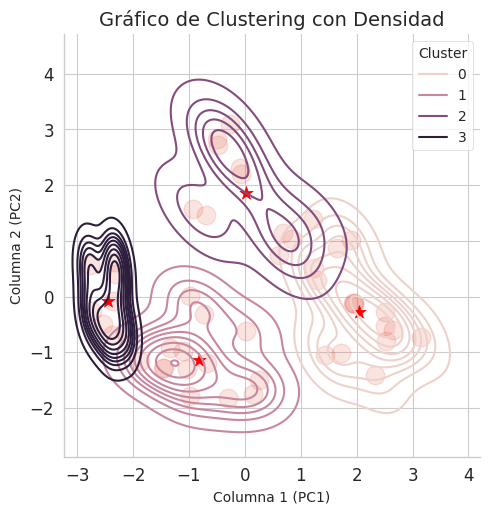

In [ ]:
# opción gráfico con densidad de los clusters
# Configuración del tamaño del gráfico
plt.figure(figsize=(20, 20))

# Gráfico de dispersión de puntos
sns.lmplot(data= df, x= 'Columna_1', y= 'Columna_2', fit_reg= False, scatter_kws={'alpha':0.15, 's':180})
# Gráfico de densidad visto en clases
sns.kdeplot(data= df, x= 'Columna_1', y= 'Columna_2', hue= 'Cluster')
#sns.kdeplot(data=X_pca, x=X_pca[:, 0], y=X_pca[:, 1], fill=True)

# centroides
plt.scatter(center_coord[0], center_coord[1], s=100, color='red', marker='*')

# Personalización de la apariencia del gráfico
sns.set_style('whitegrid')
plt.title('Gráfico de Clustering con Densidad', fontsize=14)
plt.xlabel('Columna 1 (PC1)', fontsize=10)
plt.ylabel('Columna 2 (PC2)', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda personalizada
#handles, labels = scatter.get_legend_handles_labels()
#plt.legend(handles=handles[:0], labels=labels[:3], title='Centroides', fontsize=10, title_fontsize=10)

# Mostrar el gráfico
plt.show();